# Stroke Prediction

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score

In [57]:
df = pd.read_csv('healthcare-stroke.csv')
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


In [58]:
df.drop(columns=['id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


- There are 5110 columns in the dataset.
- The only column that contains `null` is `bmi`.

In [59]:
def piedist(data, column, labels):
    """
    Plots the distribution percentage of a categorical column
    in a pie chart.
    """
    dist = data[column].value_counts()
    colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#be99ff']
    plt.pie(x=dist, labels=labels, autopct='%1.2f%%', pctdistance=0.5, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

## EDA 

### BMI

#### How does BMI relate to stroke?

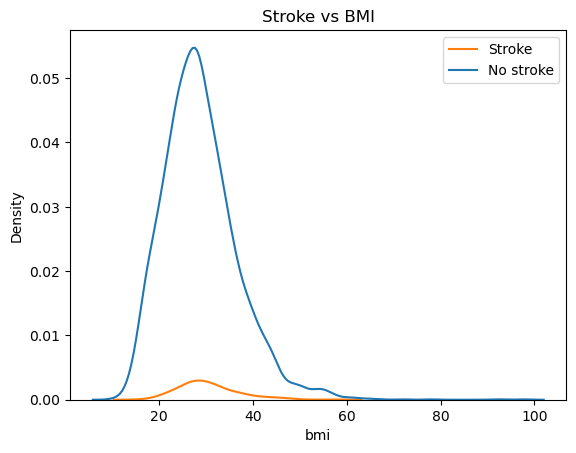

In [60]:
sns.kdeplot(data=df, x='bmi', hue='stroke')
plt.title('Stroke vs BMI')
plt.legend(['Stroke', 'No stroke'])

- BMI doesn't have a serious effect on the stroke.

### Gender

<Axes: title={'center': 'Gender Distribution'}, xlabel='gender', ylabel='count'>

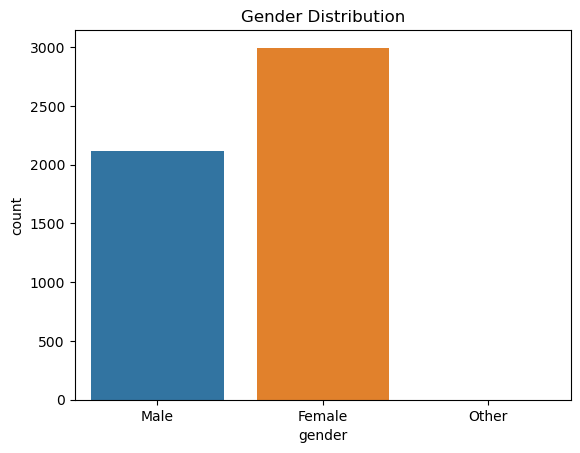

In [61]:
plt.title('Gender Distribution')
sns.countplot(x=df['gender'])

- Most people in the dataset are female

In [62]:
# Number of people with gender of "Other"
(df['gender'] == 'Other').sum()

1

In [63]:
# There's only one person with a gender of other, we can drop it
df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)

#### How does gender relate to stroke?

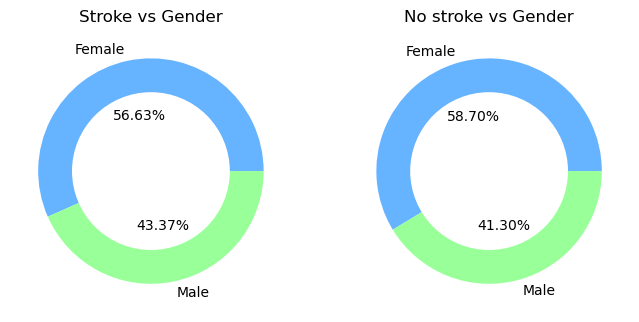

In [64]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Gender')
piedist(data=df[df['stroke'] == 1], column='gender', labels=['Female', 'Male'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Gender')
piedist(data=df[df['stroke'] == 0], column='gender', labels=['Female', 'Male'])

- The difference in gender percentage is due to more female in the dataset.
- Stroke doesn't seem to be biased to a specific gender.

### Age

<Axes: xlabel='age'>

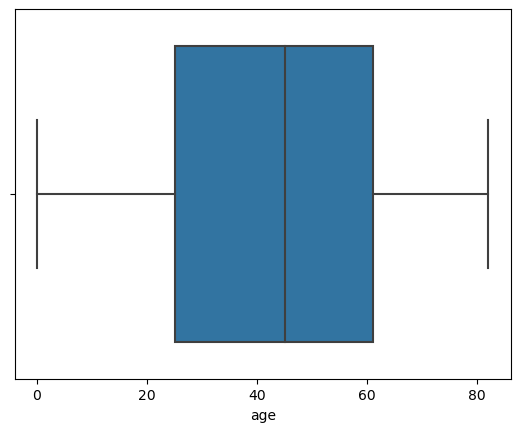

In [65]:
sns.boxplot(x=df['age'])

- Age doesn't include any outliers.

#### How does age relate to stroke?

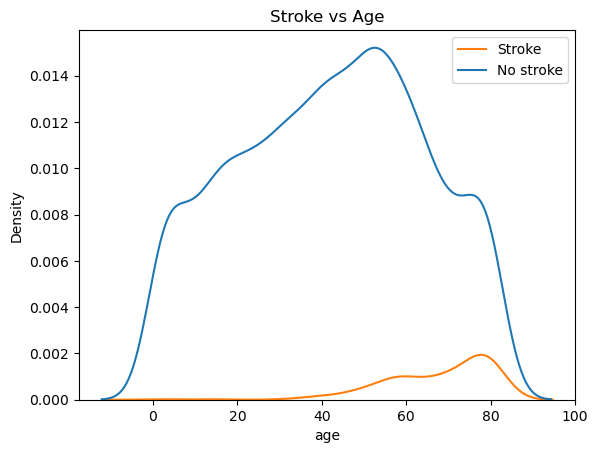

In [66]:
sns.kdeplot(data=df, x='age', hue='stroke')
plt.title('Stroke vs Age')
plt.legend(['Stroke', 'No stroke'])

- People with age > 40 tend to have stroke more than younger people.

### Hypertension

#### How does hypertension relate to stroke?

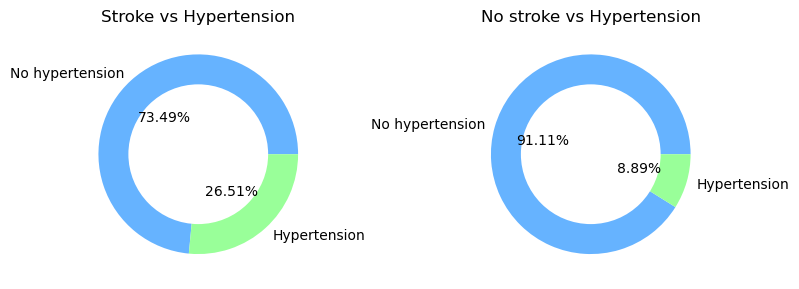

In [67]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Hypertension')
piedist(data=df[df['stroke'] == 1], column='hypertension', labels=['No hypertension', 'Hypertension'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Hypertension')
piedist(data=df[df['stroke'] == 0], column='hypertension', labels=['No hypertension', 'Hypertension'])

plt.tight_layout()

- Most people don't have hypertension.
- People with hypertension tend to have stroke; 26.5% of people with stroke have hypertension.

[Text(0, 0, 'No heart disease'), Text(1, 0, 'Heart disease')]

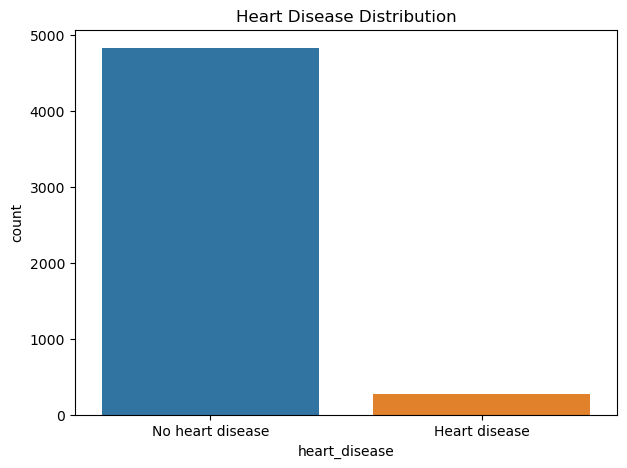

In [68]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.title('Heart Disease Distribution')
sns.countplot(x=df['heart_disease'])
ax.set_xticklabels(['No heart disease', 'Heart disease'])

#### How does having a heart disease relate to stroke?

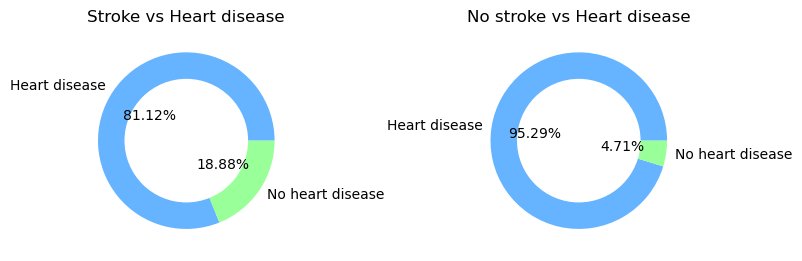

In [69]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Heart disease')
piedist(data=df[df['stroke'] == 1], column='heart_disease', labels=['Heart disease', 'No heart disease'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Heart disease')
piedist(data=df[df['stroke'] == 0], column='heart_disease', labels=['Heart disease', 'No heart disease'])

plt.tight_layout()

- Most people don't have a heart disease.
- People with heart diseases tend to have stroke; 18.88% of people with stroke have heart diseases.

### Heart Disease

[Text(0, 0, 'No heart disease'), Text(1, 0, 'Heart disease')]

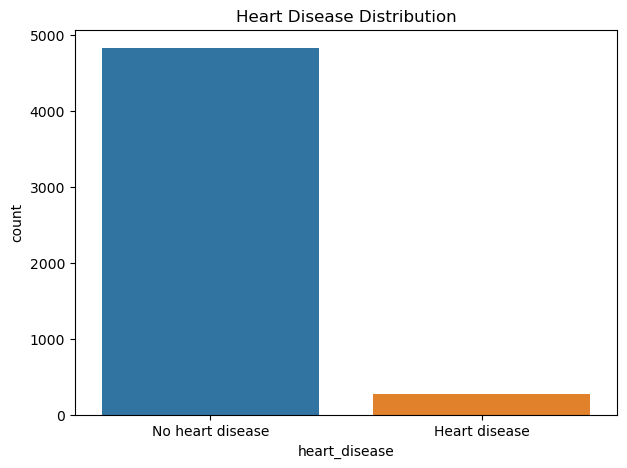

In [70]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.title('Heart Disease Distribution')
sns.countplot(x=df['heart_disease'])
ax.set_xticklabels(['No heart disease', 'Heart disease'])

#### How does having a heart disease relate to stroke?

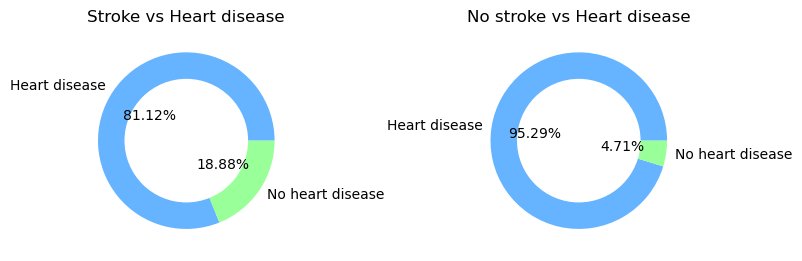

In [71]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Heart disease')
piedist(data=df[df['stroke'] == 1], column='heart_disease', labels=['Heart disease', 'No heart disease'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Heart disease')
piedist(data=df[df['stroke'] == 0], column='heart_disease', labels=['Heart disease', 'No heart disease'])

plt.tight_layout()

- Most people don't have a heart disease.
- People with heart diseases tend to have stroke; 18.88% of people with stroke have heart diseases.

### Ever Married

<Axes: xlabel='ever_married', ylabel='count'>

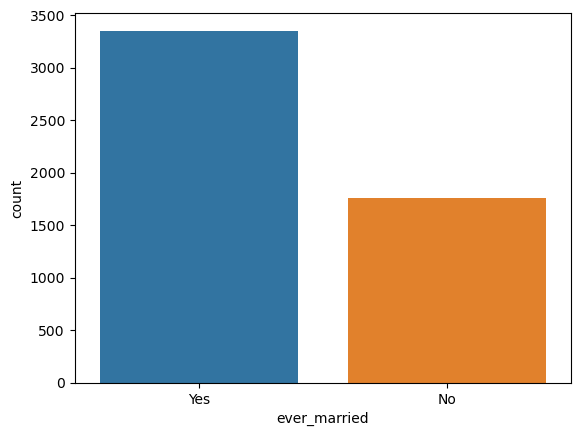

In [72]:
sns.countplot(x=df['ever_married'])

- Most people in the dataset have married before.

#### How does ever marrying relate to stroke?

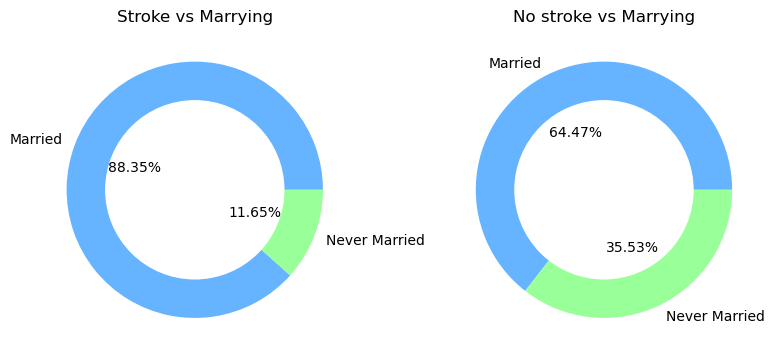

In [73]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Marrying')
piedist(data=df[df['stroke'] == 1], column='ever_married', labels=['Married', 'Never Married'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Marrying')
piedist(data=df[df['stroke'] == 0], column='ever_married', labels=['Married', 'Never Married'])

plt.tight_layout()

- The majority of people (88.35%) with stroke are married.

### Work Type

<Axes: title={'center': 'Work Type Distribution'}, xlabel='work_type', ylabel='count'>

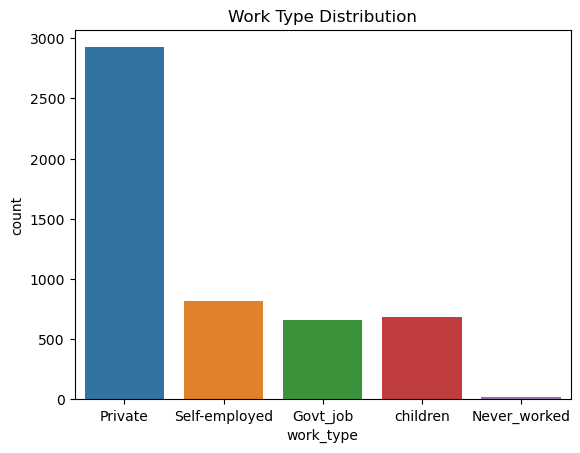

In [74]:
plt.title('Work Type Distribution')
sns.countplot(data=df, x='work_type')

In [75]:
(df['work_type'] == 'Never_worked').sum()

22

- Most people have a work type of private.
- A tiny percent of people never worked.

#### How does work type relate to stroke?

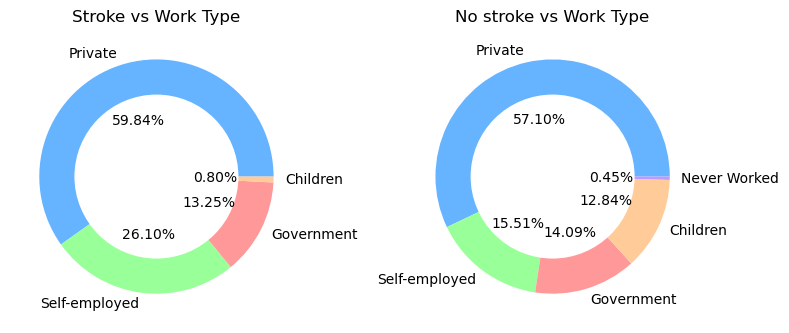

In [76]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Work Type')
piedist(data=df[df['stroke'] == 1], column='work_type', labels=['Private', 'Self-employed', 'Government', 'Children'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Work Type')
piedist(data=df[df['stroke'] == 0], column='work_type', labels=['Private', 'Self-employed', 'Government', 'Children', 'Never Worked'])

plt.tight_layout()

- Most children don't have stroke.
- Self-employed people are more likely to have stroke than others.

### Residence Type

<Axes: xlabel='Residence_type', ylabel='count'>

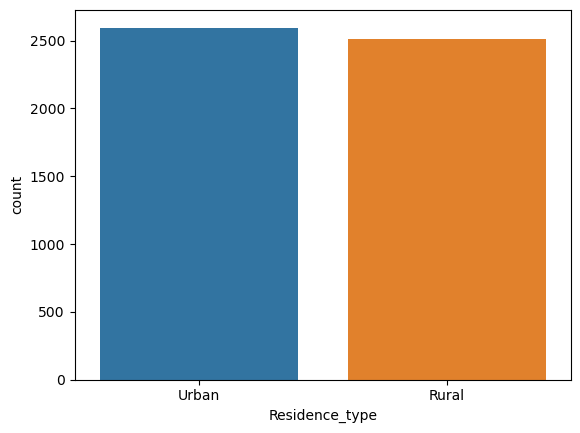

In [77]:
sns.countplot(x=df['Residence_type'])

- People are evenly distributed between rural and urban residence.

#### How does residence type relate to stroke?

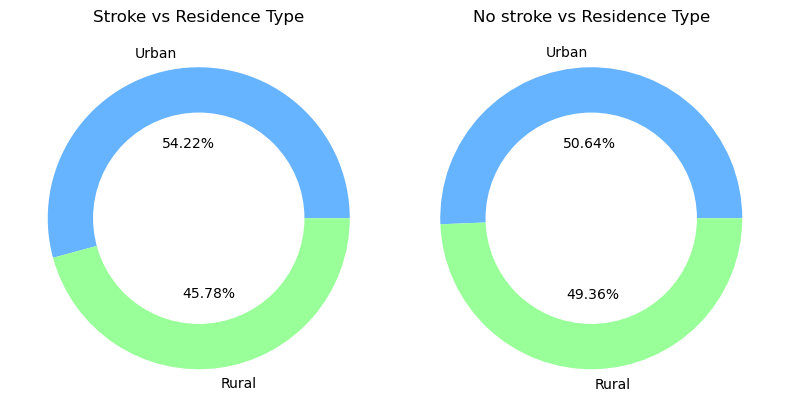

In [78]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Residence Type')
piedist(data=df[df['stroke'] == 1], column='Residence_type', labels=['Urban', 'Rural'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Residence Type')
piedist(data=df[df['stroke'] == 0], column='Residence_type', labels=['Urban', 'Rural'])

plt.tight_layout()

- Urban residents are slightly more likely to have stroke than rural residents.

### Average Glucose Level

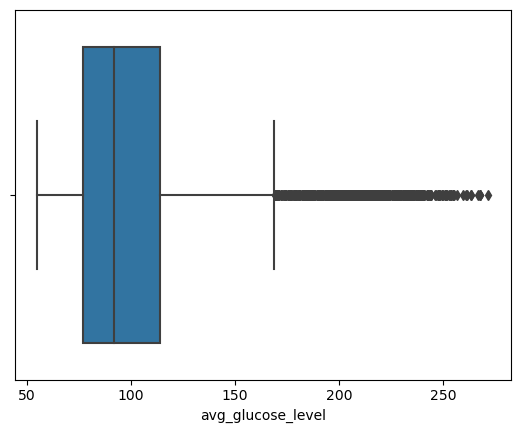

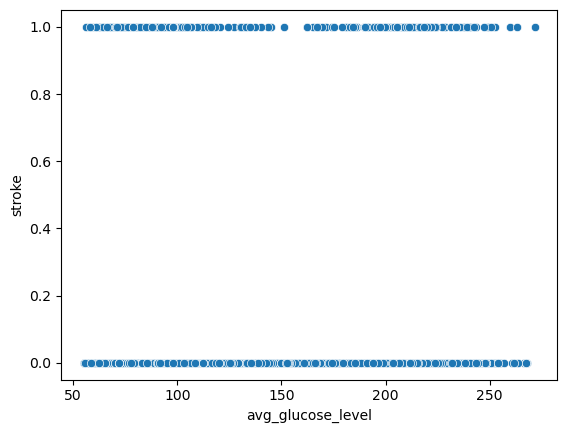

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

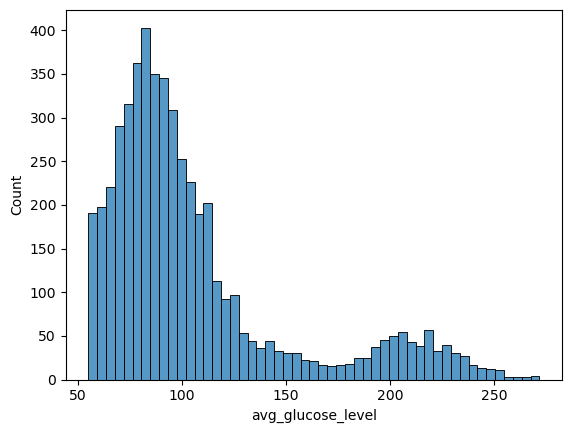

In [79]:
sns.boxplot(x=df['avg_glucose_level'])
plt.show()
sns.scatterplot(data=df, x='avg_glucose_level', y='stroke')
plt.show()
sns.histplot(df['avg_glucose_level'])

- Average glucose level doesn't include a lot of outliers.

#### How does average glucose level relate to stroke?

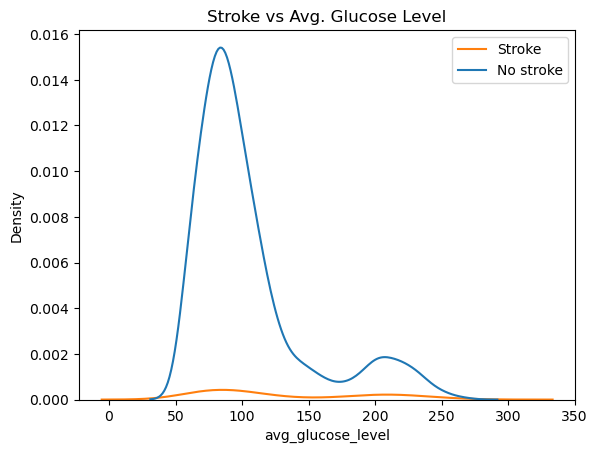

In [80]:
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke')
plt.title('Stroke vs Avg. Glucose Level')
plt.legend(['Stroke', 'No stroke'])

- People with an average glucose level > 100 are more likely yo have stroke.

### Smoking Status

<Axes: title={'center': 'Smoking Status Distribution'}, xlabel='smoking_status', ylabel='count'>

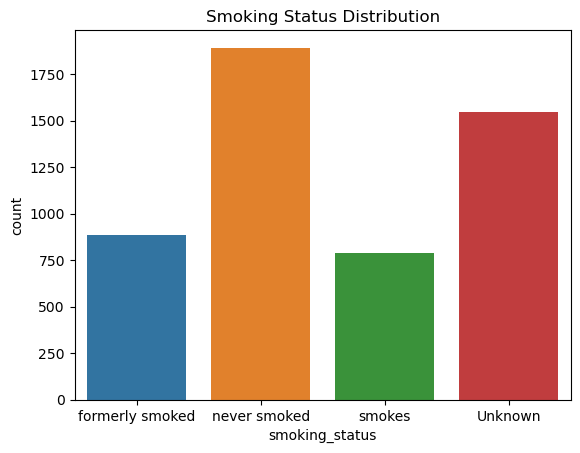

In [81]:
plt.title('Smoking Status Distribution')
sns.countplot(data=df, x='smoking_status')

- Most people never smoked.
- A big amount of people's smoking status in the dataset is unknown.

#### How does smoking status relate to stroke?

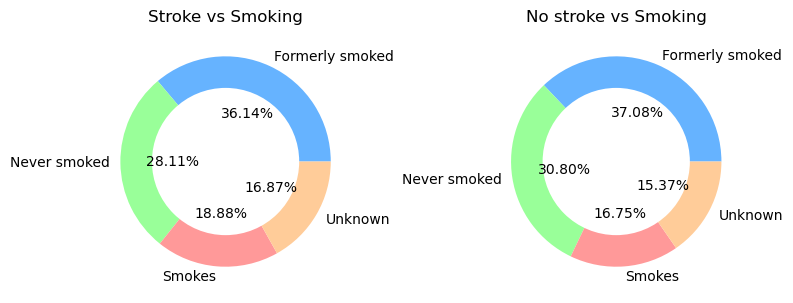

In [82]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Smoking')
piedist(data=df[df['stroke'] == 1], column='smoking_status', labels=['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('No stroke vs Smoking')
piedist(data=df[df['stroke'] == 0], column='smoking_status', labels=['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown'])

plt.tight_layout()

- People who smoke are slightly more likely to have stroke.
- Smoking doesn't seem to have a big effect on having stroke though.

## Preprocessing

### Handling N/A's and Outliers

In [83]:
f"Percentage of null in BMI is {df['bmi'].isna().sum() / len(df) * 100}%"

'Percentage of null in BMI is 3.9342337052260716%'

Text(0.5, 1.0, 'BMI distribution before filling nulls')

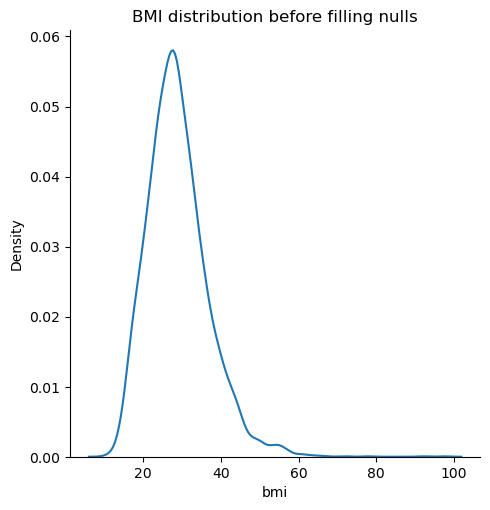

In [84]:
sns.displot(df['bmi'], kind='kde')
plt.title('BMI distribution before filling nulls')

In [85]:
# Replace null in BMI with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

Text(0.5, 1.0, 'BMI distribution after filling nulls')

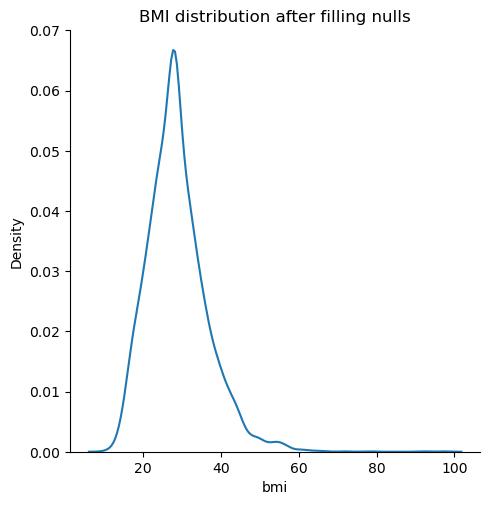

In [86]:
sns.displot(df['bmi'], kind='kde')
plt.title('BMI distribution after filling nulls')

<Axes: xlabel='bmi'>

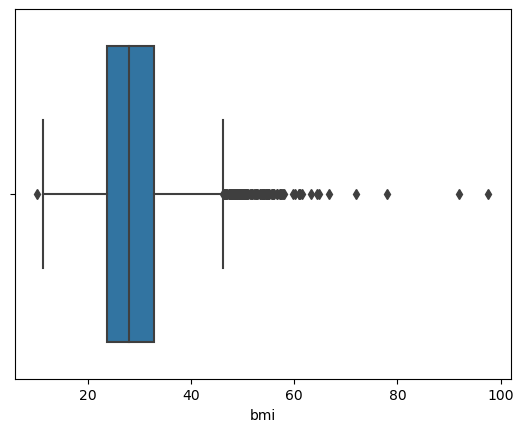

In [87]:
sns.boxplot(x=df['bmi'])

In [88]:
# Drop outliers with BMI > 70
df.drop(df[df['bmi'] >= 70].index, axis=0, inplace=True)

### Encoding

#### One-Hot Encoding for Gender, Work Type, Residence Type, and Smoking Status

In [89]:
df = df.join(pd.get_dummies(df['gender']))
df.drop(columns=['gender'], inplace=True)
df.rename(columns={'Female': 'female', 'Male': 'male'}, inplace=True)

df = df.join(pd.get_dummies(df['work_type']))
df.drop(columns=['work_type'], inplace=True)
df.rename(columns={
    'Private': 'private_work',
    'Self-employed': 'self_employed',
    'Govt_job': 'government_work',
    'children': 'children_work',
    'Never_worked': 'never_worked'
}, inplace=True)

df = df.join(pd.get_dummies(df['Residence_type']))
df.drop(columns=['Residence_type'], inplace=True)
df.rename(columns={'Urban': 'urban_resident',
          'Rural': 'rural_resident'}, inplace=True)

df = df.join(pd.get_dummies(df['smoking_status']))
df.drop(columns=['smoking_status'], inplace=True)
df.rename(columns={
    'formerly smoked': 'formerly_smoked',
    'never smoked': 'never_smoked',
    'Unknown': 'smoking_unknown'
}, inplace=True)

df.head().T

,0,1,2,3,4
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.1,32.5,34.4,24.0
stroke,1,1,1,1,1
female,0,1,0,1,1
male,1,0,1,0,0
government_work,0,0,0,0,0


In [90]:
scaler = StandardScaler()
continuous_columns = ['avg_glucose_level', 'bmi', 'age']
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

# Should have a mean of ~0 and std of ~1
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_glucose_level,5105.0,1.336182e-16,1.000098,-1.127324,-0.637734,-0.314950,0.175523,3.658545
bmi,5105.0,8.323302e-16,1.000098,-2.457758,-0.666139,-0.095475,0.528274,5.040500
age,5105.0,-1.113485e-17,1.000098,-1.908455,-0.806548,0.077808,0.785292,1.713865


#### Encode Ever Married

In [91]:
df['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['ever_married'].dtype

dtype('int64')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5105 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5105 non-null   float64
 1   hypertension       5105 non-null   int64  
 2   heart_disease      5105 non-null   int64  
 3   ever_married       5105 non-null   int64  
 4   avg_glucose_level  5105 non-null   float64
 5   bmi                5105 non-null   float64
 6   stroke             5105 non-null   int64  
 7   female             5105 non-null   uint8  
 8   male               5105 non-null   uint8  
 9   government_work    5105 non-null   uint8  
 10  never_worked       5105 non-null   uint8  
 11  private_work       5105 non-null   uint8  
 12  self_employed      5105 non-null   uint8  
 13  children_work      5105 non-null   uint8  
 14  rural_resident     5105 non-null   uint8  
 15  urban_resident     5105 non-null   uint8  
 16  smoking_unknown    5105 

#### Separate Features and Label

In [147]:
X = df.drop(columns=['stroke'])
y = df['stroke']

#### Over-Sample using SMOTE

Use SMOTE to handle over-sampling as stroke is under-represented in the dataset.

In [148]:
categorical_features = [
    'hypertension',
    'heart_disease',
    'ever_married',
    'female',
    'male',
    'government_work',
    'never_worked',
    'private_work',
    'self_employed',
    'children_work',
    'rural_resident',
    'urban_resident',
    'smoking_unknown',
    'formerly_smoked',
    'never_smoked',
    'smokes'
]

smote = SMOTENC(categorical_features=[feature in categorical_features for feature in X.columns])
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Split Test and Train Datasets

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

## Modeling

In [150]:
# Keeps track of models and their scores
model_names = []
model_scores = []

In [151]:
def confusion_matrix_plot(matrix, model_name):
  """
  Plots the confusion matrix of a model as a heatmap.
  """
  _, ax = plt.subplots(figsize=(5, 3))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

### Logistic Regression

In [152]:
lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

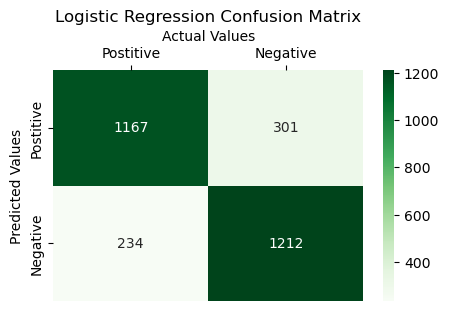

In [153]:
confusion_matrix_plot(confusion_matrix(y_test, lr.predict(X_test)), 'Logistic Regression')

In [154]:
model_names.append('Logistic Regression')
model_scores.append(roc_auc_score(y_test, lr.predict(X_test)))

### Decision Tree

In [155]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

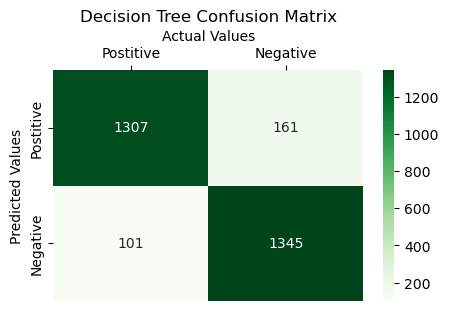

In [156]:
confusion_matrix_plot(confusion_matrix(y_test, dt.predict(X_test)), 'Decision Tree')

In [157]:
model_names.append('Decision Tree')
model_scores.append(roc_auc_score(y_test, dt.predict(X_test)))

### Random Forest

In [158]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

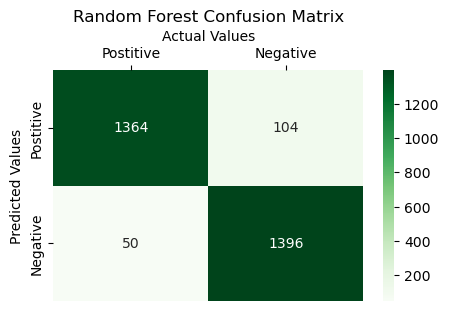

In [159]:
confusion_matrix_plot(confusion_matrix(y_test, rf.predict(X_test)), 'Random Forest')

In [160]:
model_names.append('Random Forest')
model_scores.append(roc_auc_score(y_test, rf.predict(X_test)))

### XGBoost

In [161]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

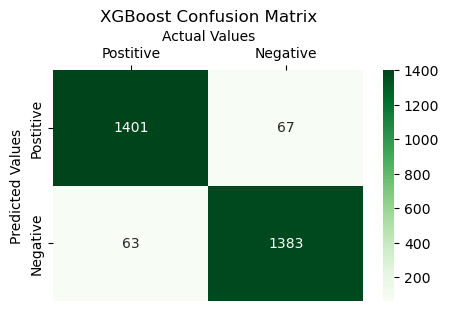

In [162]:
confusion_matrix_plot(confusion_matrix(y_test, xgb.predict(X_test)), 'XGBoost')

In [163]:
model_names.append('XGBoost')
model_scores.append(roc_auc_score(y_test, xgb.predict(X_test)))

In [164]:
model_and_score = pd.DataFrame()
model_and_score['name'] = model_names
model_and_score['score'] = model_scores
model_and_score.style.background_gradient(cmap=sns.light_palette('green', as_cmap=True))

,name,score
0,Logistic Regression,0.816567
1,Decision Tree,0.910240
2,Random Forest,0.947289
3,XGBoost,0.955396
